## Methods start here

In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import LinearSVC, SVC
import xgboost as xgb

from multiprocessing import Process, Manager

In [ ]:
def set_Data(data):
    ppmi = pd.read_csv('../../datasets/preprocessed/trans_processed_PPMI_data.csv')
    ppmi.rename(columns={'Unnamed: 0':'Sentrix_position'}, inplace=True)
    ppmi.set_index('Sentrix_position', inplace=True)
    ppmi = ppmi.transpose()

    encoder = LabelEncoder()
    label = encoder.fit_transform(ppmi['Category'])
    print("Labeling of the classes:")
    print(encoder.classes_)

    tr = ppmi.drop(['Category'], axis=1)
    X = tr.values
    y = label
    print(X.shape)
    print(y.shape)

    print("StratifiedSampling check")
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    split.get_n_splits(X, y)

    for train_index, test_index in split.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, data['y_test'] = y[train_index], y[test_index]

    print("Oversampling check")
    oversampler = SMOTE(random_state=42)
    X_train_sampled, data['y_train_sampled'] = oversampler.fit_resample(X_train, y_train)
    print("Scaling check")
    scaler = StandardScaler()
#     scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_sampled)
    data['X_train_scaled_1'] = X_train_scaled[:247].reshape((1, -1))
    data['X_train_scaled_2'] = X_train_scaled[247:].reshape((1, -1))
    data['X_test_scaled'] = scaler.transform(X_test)
    
    print("Returning check")

manager = Manager()
data = manager.dict()

print("CHECKPOINT1")
#     p = Process(target=set_Data, args=(X_train_scaled, X_test_scaled, y_train_sampled, y_test,))
p = Process(target=set_Data, args=(data,))
print("CHECKPOINT2")
p.start()
print("CHECKPOINT3")
p.join()

In [ ]:
y_train_sampled = data['y_train_sampled']
y_test = data['y_test']
X_train_scaled = np.append(data['X_train_scaled_1'], data['X_train_scaled_2']).reshape(494, 747668)
X_test_scaled = data['X_test_scaled']
print ("Shape of final train and test sets:", X_train_scaled.shape, X_test_scaled.shape)

### Start Methods Here

In [19]:
import evalfw
import pipelines

In [ ]:
'''
params = {
    "pca": {"n":n},
    "ica": {"n":n},
    "umap":{"n_neighbours":k, "min_dist":md, "n":n},
    "fs":{"a":a},
    "lr":{"C":C, "reg":reg},
    "svm:"{"kernel", kernel, "C":C, "gamma":gamma, "coef0":c, "degree":d},
    "xgb":{"n":n, "h":h, "lr":lr, "s":s, "c":c}
}
'''

In [ ]:
### PCA + LR 5 folds
pca_lr_dr1 = {"n":40}
pca_lr_clf1  = {"C":0.01, "reg":"l2"}

pca_lr_dr2 = {"n":40}
pca_lr_clf2= {"C":0.1, "reg":"l2"}

In [ ]:
### ICA + LR 5 folds
ica_lr_dr1 = {"n":40}
ica_lr_clf1 = {"C":100, "reg":"l1"}

ica_lr_dr2 = {"n":40}
ica_lr_clf2 = {"C":1000, "reg":"l2"}


In [3]:
### UMAP + LR 5 folds
umap_lr_dr1 = {"n_neighbours":20, "min_dist":0.5, "n":40},
umap_lr_clf1 = {"C":100, "reg":"l2"}

umap_lr_dr2 = {"n_neighbours":15, "min_dist":0.5, "n":40},
umap_lr_clf2 = {"C":100, "reg":"l2"}

In [4]:
### FS + LR 5 folds
fs_lr_dr1 = {"a":0.09}
fs_lr_clf1 = {"C":1, "reg":"l1"}

fs_lr_dr2 = {"a":0.08}
fs_lr_clf2 = {"C":1, "reg":"l2"}

In [6]:
### PCA + SVM
pca_svm_dr1 = {"n":16}
pca_svm_clf1 = {"kernel":"poly", "C":0.001, "gamma":1.5, "coef0":3, "degree":3}

In [11]:
### ICA + SVM
ica_svm_dr1 = {"n":16}
ica_svm_clf1 = {"kernel":"rbf", "C":1000, "gamma":1.5, "coef0":3, "degree":3}

In [12]:
### UMAP + SVM
umap_svm_dr1 = {"n_neighbours":3, "min_dist":0.4, "n":10}
umap_svm_clf1 = {"kernel":"poly", "C":0.001, "gamma":1, "coef0":10, "degree":3}

umap_svm_dr2 = {"n_neighbours":10, "min_dist":0.7, "n":18}
umap_svm_clf2 = {"kernel":"poly", "C":0.001, "gamma":1.5, "coef0":10, "degree":3}

umap_svm_dr3 = {"n_neighbours":5, "min_dist":0.7, "n":18}
umap_svm_clf3 = {"kernel":"poly", "C":0.01, "gamma":1.5, "coef0":10, "degree":3}

umap_svm_dr4 = {"n_neighbours":3, "min_dist":0.4, "n":22}
umap_svm_clf4 = {"kernel":"poly", "C":0.001, "gamma":1.5, "coef0":10, "degree":3}

umap_svm_dr5 = {"n_neighbours":10, "min_dist":0.1, "n":14}
umap_svm_clf5 = {"kernel":"poly", "C":0.01, "gamma":1.5, "coef0":10, "degree":3}


In [13]:
### FS + SVM
fs_svm_dr1 = {"a":0.1},
fs_svm_clf1 = {"kernel":"poly", "C":1, "gamma":1.5, "coef0":10, "degree":3}


In [14]:
### PCA + XGB
pca_xgb_dr1 = {"n":13}
pca_xgb_clf1 = {'n': 30, 'c': 0.7, 's': 0.3, 'h': 4, "lr":0.3}

pca_xgb_dr2 = {"n":10}
pca_xgb_dr2 = {'n': 30, 'c': 0.7, 's': 0.3, 'h': 4, "lr":0.3}

pca_xgb_dr3 = {"n":10}
pca_xgb_clf3 = {'n': 70, 'c': 0.5, 's': 0.5, 'h': 5, "lr":0.3}

In [15]:
### ICA + XGB
ica_xgb_dr1 = {"n":5}
ica_xgb_clf1 = {'n': 10, 'c': 0.1, 's': 0.5, 'h': 3, "lr":0.3}

ica_xgb_dr2 = {"n":9}
ica_xgb_clf2 = {'n': 300, 'c': 0.5, 's': 0.3, 'h': 4, "lr":0.3}

ica_xgb_dr3 = {"n":11}
ica_xgb_clf3 = {'n': 100, 'c': 0.3, 's': 0.5, 'h': 2, "lr":0.3}

In [16]:
### UMAP + SGB
umap_xgb_dr1 = {"n_neighbours":11, "min_dist":0.4, "n":10}
umap_xgb_clf1 = {'n': 30, 'c': 0.7, 's': 0.3, 'h': 4, "lr":0.3}

umap_xgb_dr2 = {"n_neighbours":11, "min_dist":0.4, "n":10}
umap_xgb_clf2 = {'n': 30, 'c': 0.7, 's': 0.3, 'h': 4, "lr":0.3}

In [17]:
##FS + XGB
fs_xgb_dr1 = {"a":0.01},
fs_xgb_clf1 = {'n': 30, 'c': 0.3, 's': 0.3, 'h': 4, "lr":0.3}

fs_xgb_dr2 = {"a":0.005},
fs_xgb_clf2 = {'n': 10, 'c': 0.3, 's': 0.7, 'h': 3, "lr":0.3}

In [18]:
# add 5 sets of parameters into dictionary and feed to get_pipelines, train and then eval
# try 1 set first
for i in range(1):
    clf_dict={}
    for dr in ["pca", "ica", "umap", "fs"]:
        for clf in ["lr", "svm", "xgb"]:            
            cur_params = {}
            cur_params[dr] = dr+"_"+clf+"_dr"+str(i+1)
            cur_params[clf] = dr+"_"+clf+"_clf"+str(i+1)
            cur_pipeline = pipelines.get_pipeline(dr, clf, cur_params, X_train_scaled, y_train_sampled)
            clf_dict[dr+"_"+clf+"_"+str(i+1)] = cur_pipeline
    
    assert len(clf_dict) == 12
    
    evalfw.eval(clf_dict, X_test_scaled, y_test)

NameError: name 'pipelines' is not defined

In [73]:
# Evaluate the default classifiers on the ppmi testing datasets
default_pramas_clf_dict = get_default_clf_dict(X_train_scaled, y_train_sampled)
evalfw.eval(default_pramas_clf_dict, X_test_scaled, y_test)

NameError: name 'get_default_clf_dict' is not defined

In [1]:
import default_pipelines
import evalfw

Using TensorFlow backend.


In [2]:
import importlib

In [34]:
importlib.reload(default_pipelines)
importlib.reload(evalfw)

<module 'evalfw' from '/local/sdc/rz296/methyl-data-handling/testing/evalfw.py'>

Current pipeline is: pca lr
Current pipeline is: ica lr
Current pipeline is: umap lr


/home/rz296/miniconda3/envs/partII/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Current pipeline is: pca svm
Current pipeline is: ica svm
Current pipeline is: umap svm


/home/rz296/miniconda3/envs/partII/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


{'lr': {'pca_lr_base': {'acc': [0.92], 'prec': [0.9285714285714286], 'recall': [0.9285714285714286], 'f1': [0.9285714285714286], 'auc': [0.9188311688311689]}, 'ica_lr_base': {'acc': [0.88], 'prec': [1.0], 'recall': [0.7857142857142857], 'f1': [0.88], 'auc': [0.8928571428571428]}, 'umap_lr_base': {'acc': [0.88], 'prec': [0.8666666666666667], 'recall': [0.9285714285714286], 'f1': [0.896551724137931], 'auc': [0.8733766233766235]}}, 'svm': {'pca_svm_base': {'acc': [0.92], 'prec': [0.9285714285714286], 'recall': [0.9285714285714286], 'f1': [0.9285714285714286], 'auc': [0.9188311688311689]}, 'ica_svm_base': {'acc': [0.96], 'prec': [1.0], 'recall': [0.9285714285714286], 'f1': [0.962962962962963], 'auc': [0.9642857142857143]}, 'umap_svm_base': {'acc': [0.88], 'prec': [0.8666666666666667], 'recall': [0.9285714285714286], 'f1': [0.896551724137931], 'auc': [0.8733766233766235]}}}
The final pipelines and their metrics for each classifier are:
{'lr': {'ptype': 'ica_lr_base', 'pipeline': Pipeline(me

TypeError: roc_curve() got an unexpected keyword argument 'pos'

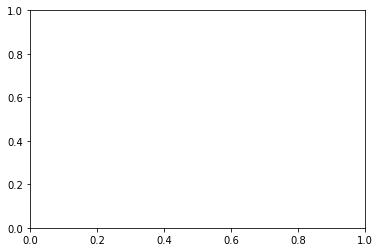

In [35]:
##USE RANDOME DATA TO TEST THE CODE FIRST
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target
indx = np.where(y > 0)
y = y[indx]
X = X[indx]
class_names = iris.target_names[:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
default_params_clf_dict = default_pipelines.get_default_clf_dict(X_train, y_train, gpu_id=2)
# print(default_params_clf_dict)
evalfw.eval(default_params_clf_dict, X_test, y_test)
